In [ ]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset and convert to DataFrame using try-except block for error handling
try:
    iris = load_iris(as_frame=True)
    df = iris.frame
    df['species'] = df['target'].map(dict(enumerate(iris.target_names)))
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ Error: Dataset not found!")

# Display first 5 rows using head() method
df.head()


✅ Dataset loaded successfully!


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [2]:
# Exploring the dataset structure, data types and searching for missing values
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

In [3]:
# Using describe for basic statistics of the dataset
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# Grouping by 'species' and computing mean of numerical columns
grouped = df.groupby('species').mean()
grouped

# Interesting observations:
# - The dataset contains 150 samples with 5 columns: 
#  sepal length, sepal width, petal length, petal width, and species.
# - There are no missing values in the dataset.
# - The species column is categorical with three unique values: 
#  setosa, versicolor, and virginica.
# - The mean values of the features vary significantly across different species, 
# indicating distinct characteristics.
# - Petal dimensions (length & width) are the strongest distinguishing features between species.
# - Setosa has the smallest petal dimensions, while Virginica has the largest.
# - Sepal dimensions also vary, but less distinctly than petal dimensions.


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


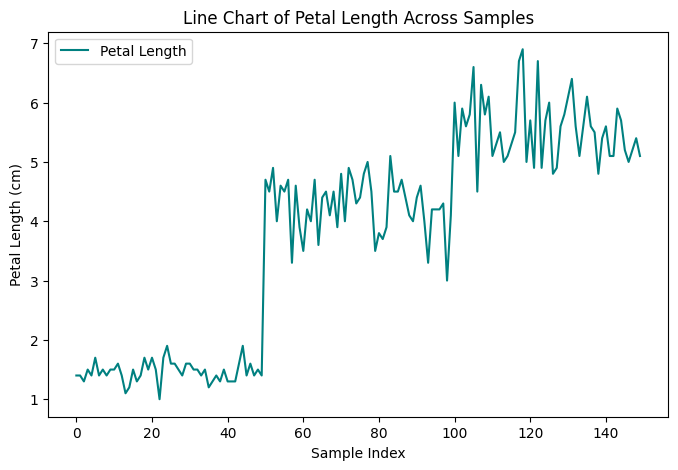

Text(0.5, 1.0, 'Line Chart of Sepal Length Across Samples')

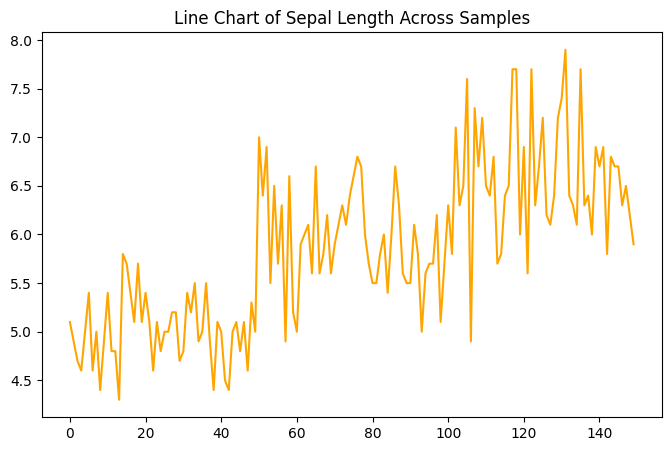

In [ ]:
# Visualizations
# Line chart for petal length and sepal length across samples
plt.figure(figsize=(8,5))
plt.plot(df.index, df['petal length (cm)'], label='Petal Length', color='teal')
plt.title("Line Chart of Petal Length Across Samples")
plt.xlabel("Sample Index")
plt.ylabel("Petal Length (cm)")
plt.legend()
plt.show()
plt.figure(figsize=(8,5))
plt.plot(df.index, df['sepal length (cm)'], label='Sepal Length', color='orange')
plt.title("Line Chart of Sepal Length Across Samples")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8700\1667875747.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='species', y='petal length (cm)', data=df, estimator='mean', palette="Set2")


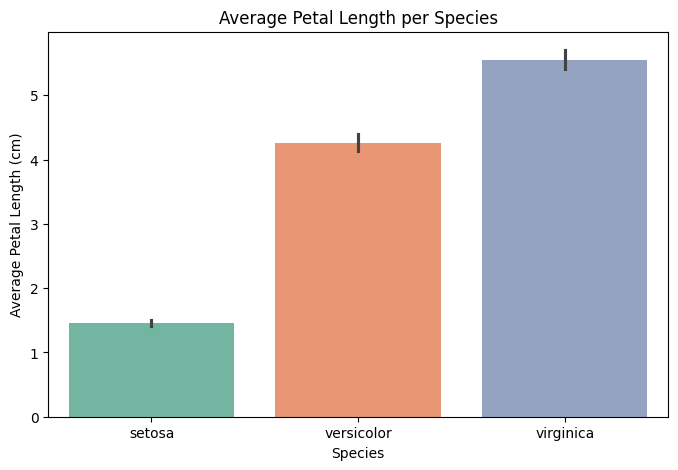

In [9]:
# Bar chart for average petal length per species
plt.figure(figsize=(8,5))
sns.barplot(x='species', y='petal length (cm)', data=df, estimator='mean', palette="Set2")
plt.title("Average Petal Length per Species")
plt.xlabel("Species")
plt.ylabel("Average Petal Length (cm)")
plt.show()


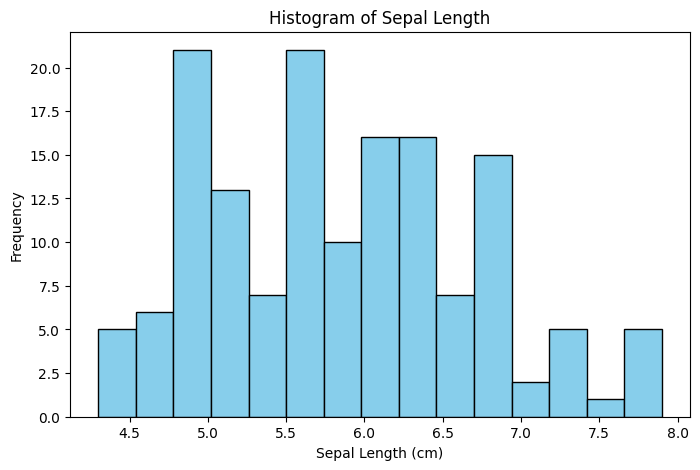

In [ ]:
# Histogram for sepal length distribution 
plt.figure(figsize=(8,5))
plt.hist(df['sepal length (cm)'], bins=15, color='skyblue', edgecolor='black')
plt.title("Histogram of Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.show()



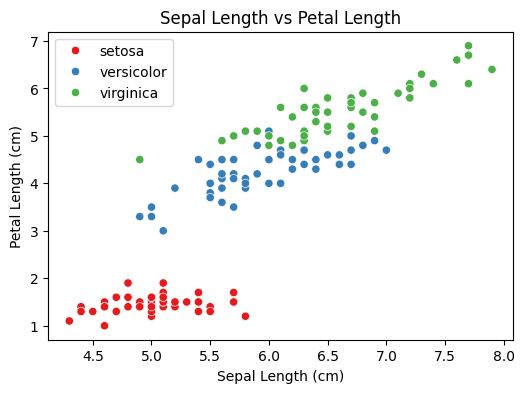

In [12]:
# Scatter plot for sepal length vs petal length colored by species
plt.figure(figsize=(6,4))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species', data=df, palette="Set1")
plt.title("Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend()
plt.show()


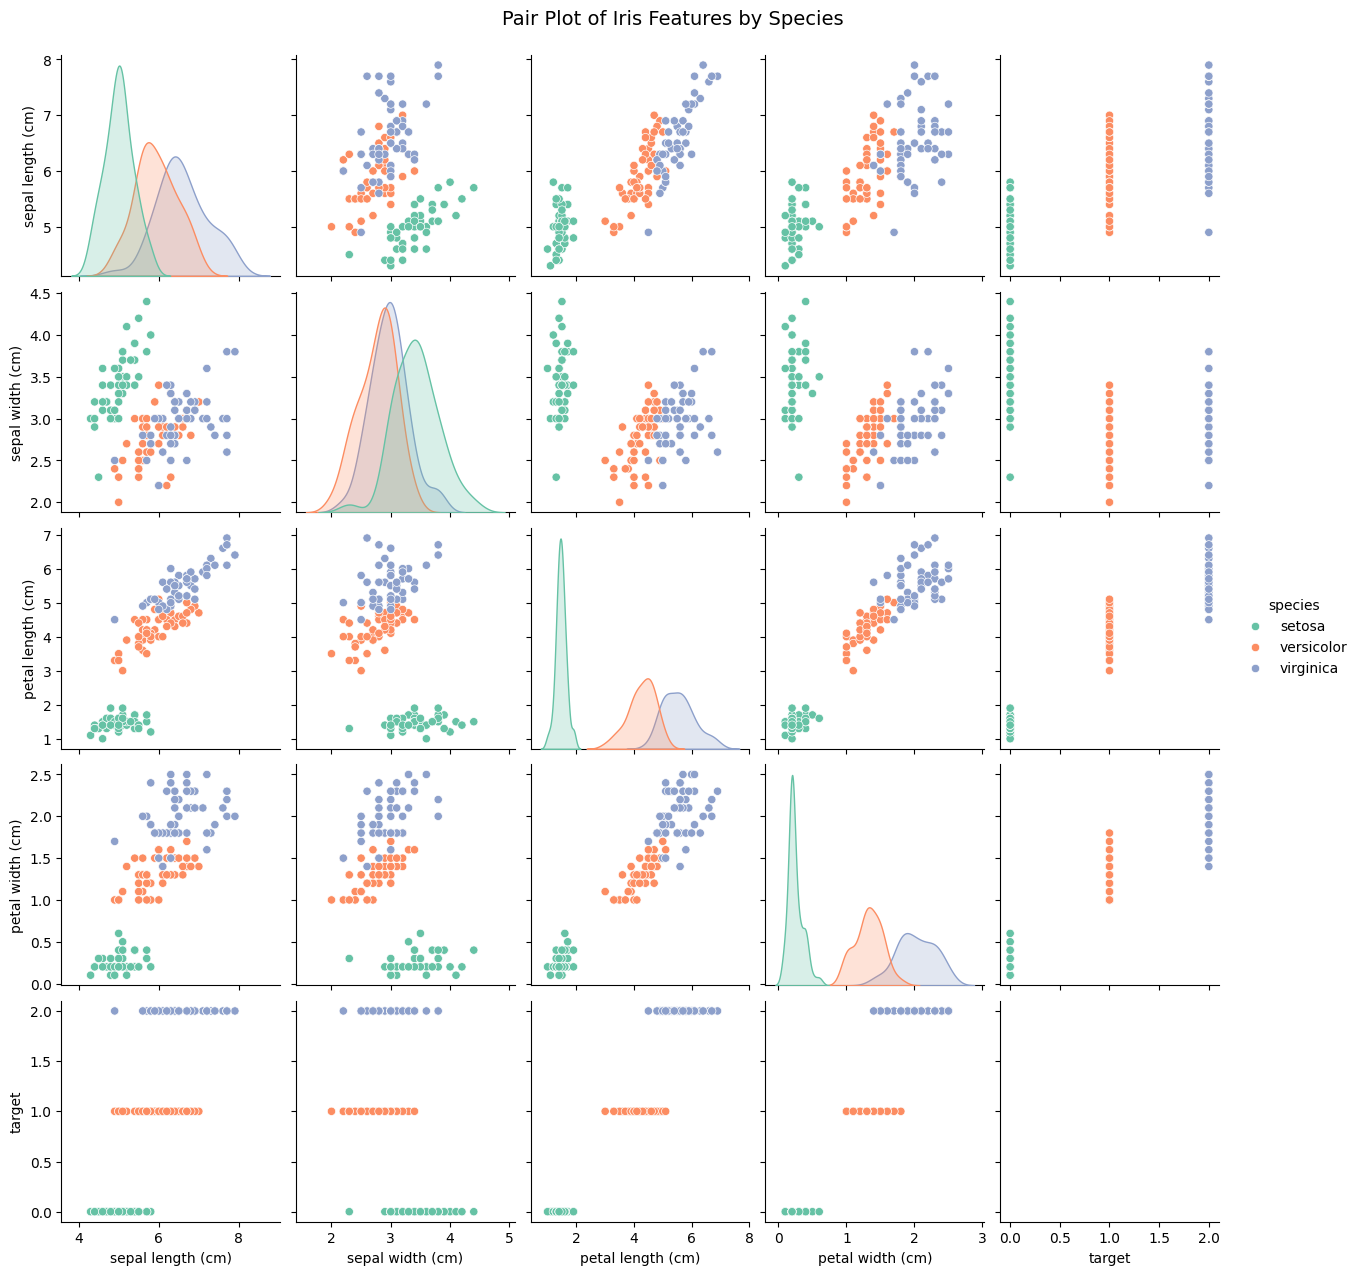

In [17]:
# pair plot for all features colored by species
pair = sns.pairplot(df, hue='species', palette="Set2")
pair.fig.suptitle("Pair Plot of Iris Features by Species", y=1.02, fontsize=14)
plt.show()
